# Capstone Project - The Battle of Neighborhoods (Week 2)
### Acquiring Data sets, cleaning and plotting:

## Unemployment Rate

In [8]:
import pandas as pd 
from pandas import DataFrame, read_csv

df_unemp = pd.read_csv('Data/OECD_unemp_rate.csv', skiprows=1)
df_unemp.drop([0], inplace=True)
df_unemp.drop('Unnamed: 1', axis=1, inplace=True)
df_unemp.replace(' ','')

df_unemp.rename(columns={'Time': 'Country'}, inplace=True)
df_unemp = df_unemp[df_unemp["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_unemp.set_index('Country', inplace=True)
unemp_tr = df_unemp.transpose()

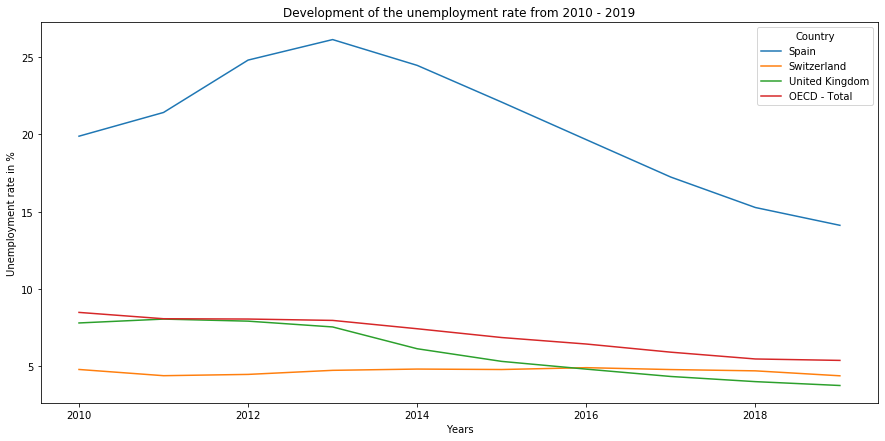

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

unemp_tr.plot(kind='line', 
             stacked=False,
             figsize=(15, 7), # pass a tuple (x, y) size
             )
plt.title('Development of the unemployment rate from 2010 - 2019')  
plt.ylabel('Unemployment rate in %')  
plt.xlabel('Years')
plt.show()

## Unit Labour Cost (ULC)

In [12]:
df_ulc = pd.read_csv('Data/OECD_ULC.csv', skiprows=6)
df_ulc.drop('Unnamed: 1', axis=1, inplace=True)
df_ulc.drop([0], inplace=True)
df_ulc.rename(columns={'Time': 'Country'}, inplace=True)
df_ulc = df_ulc[df_ulc["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_ulc.replace(' ','')
df_ulc.set_index('Country', inplace=True)
ulc_tr = df_ulc.transpose()

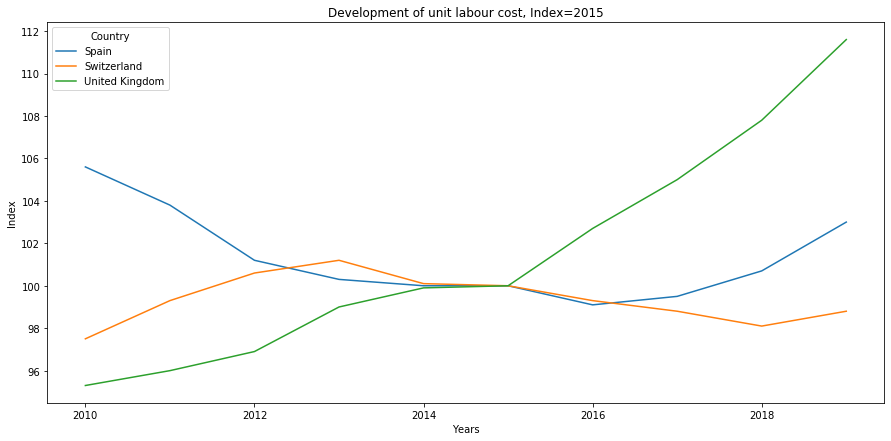

In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

ulc_tr.plot(kind='line', 
             stacked=False,
             figsize=(15, 7), # pass a tuple (x, y) size
             )
plt.title('Development of unit labour cost, Index=2015')  
plt.ylabel('Index')  
plt.xlabel('Years')
plt.show()

## Corporate Tax

In [16]:
df_ct = pd.read_csv('Data/OECD_CorpTax.csv', skiprows=3)
df_ct.drop('Unnamed: 1', axis=1, inplace=True)
df_ct.drop(df_ct.loc[0:1].index, inplace=True)
df_ct.rename(columns={'Year': 'Country'}, inplace=True)
df_ct.replace(' ','')
df_ct = df_ct[df_ct["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_ct.set_index('Country', inplace=True)
ct_tr = df_ct.astype(float).T

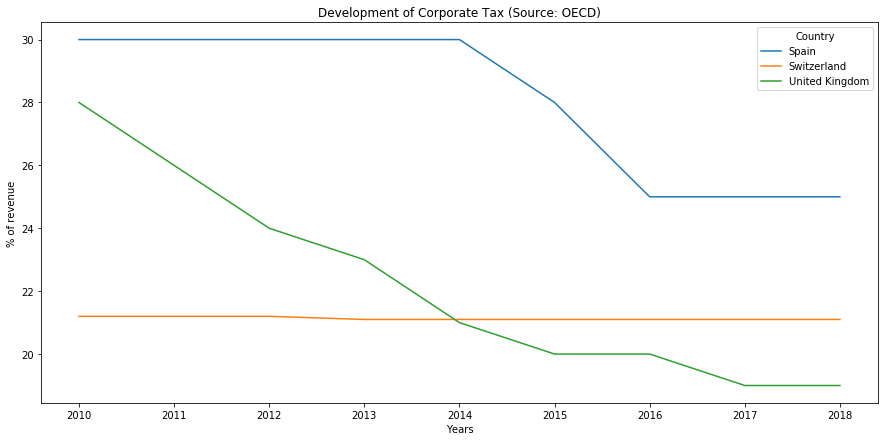

In [17]:
ct_tr.plot(kind='line', 
             stacked=False,
             figsize=(15, 7), # pass a tuple (x, y) size
             )
plt.title('Development of Corporate Tax (Source: OECD)')  
plt.ylabel('% of revenue')  
plt.xlabel('Years')
plt.show()

## Labour Wage

In [20]:
df_lw = pd.read_csv('Data/OECD_ave_wage.csv', skiprows=2, thousands="'")
df_lw.rename(columns={'Time': 'Country'}, inplace=True)
df_lw.drop([0], inplace=True)
df_lw.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3'], axis=1, inplace=True)
df_lw.replace(' ','')

df_lw = df_lw[df_lw["Country"].isin(['Switzerland', 'Spain', 'United Kingdom', 'OECD - Total'])]
df_lw.set_index('Country', inplace=True)
lw_tr = df_lw.astype(float).T

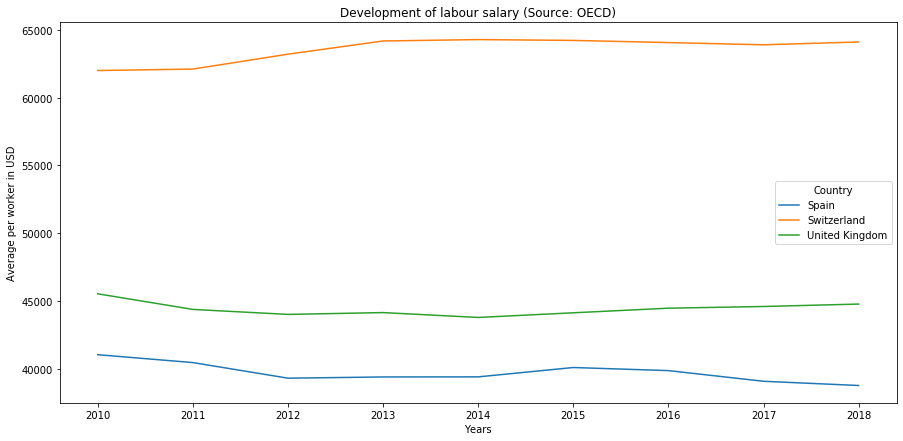

In [21]:
lw_tr.plot(kind='line', 
             stacked=False,
             figsize=(15, 7), # pass a tuple (x, y) size
             )
plt.title('Development of labour salary (Source: OECD)')  
plt.ylabel('Average per worker in USD')  
plt.xlabel('Years')
plt.show()

## Corruption Perception Index

In [23]:
cpi = pd.read_csv('Data/CPI2019.csv', skiprows = 0, index_col=False)
cpi.columns = list(map(str, cpi.columns))
cpi.replace(' ','')

cpi.drop([col for col in cpi.columns if "Sources" in col], axis=1, inplace=True)
cpi.drop([col for col in cpi.columns if "Rank" in col], axis=1, inplace=True)

cpi_sel = cpi[cpi.index % 3 == 0]
cpi_sel = cpi_sel[['Switzerland', 'United Kingdom','Spain']]
cpi_sel['Year'] = ['2019','2018','2017','2016','2015','2014','2013','2012']

In [24]:
cpi_sel.sort_values(['Year'], ascending=True, axis=0, inplace=True)
cpi_sel.set_index('Year', inplace=True)
cpi_sel

,Switzerland,United Kingdom,Spain
Year,,,
2012,86.0,74.0,65.0
2013,85.0,76.0,59.0
2014,86.0,78.0,60.0
2015,86.0,81.0,58.0
2016,86.0,81.0,58.0
2017,85.0,82.0,57.0
2018,85.0,80.0,58.0
2019,85.0,77.0,62.0


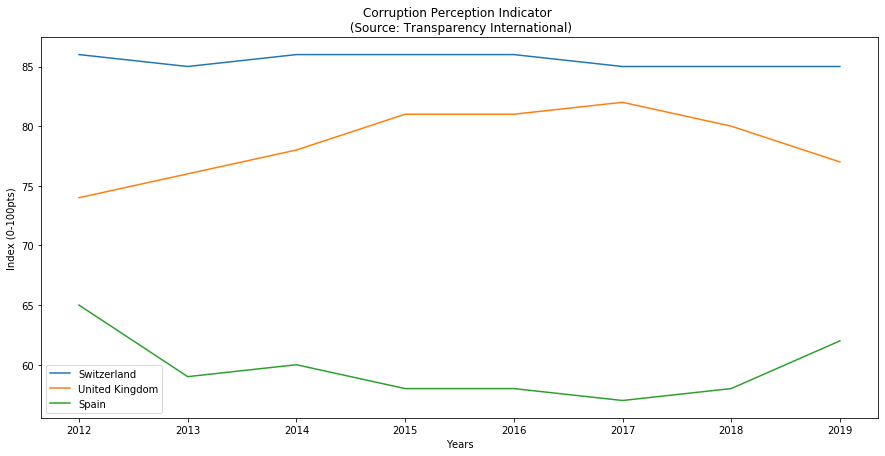

In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

cpi_sel.index = cpi_sel.index.map(int) # let's change the index values of df_top5 to type integer for plotting
cpi_sel.plot(kind='line', 
             stacked=False,
             figsize=(15, 7), # pass a tuple (x, y) size
             )

plt.title('Corruption Perception Indicator \n (Source: Transparency International)')
plt.ylabel('Index (0-100pts)')
plt.xlabel('Years')

plt.show()

## Governance Performance Indicator

In [26]:
gpi = pd.read_csv('Data/WorldBank_Governance_Indicators.csv')
gpi = gpi.dropna()
gpi.drop(['Country Code'], axis=1, inplace=True)
gpi.rename(columns={'Country Name':'Country','2010 [YR2010]':'2010','2011 [YR2011]':'2011','2012 [YR2012]':'2012','2013 [YR2013]':'2013','2014 [YR2014]':'2014','2015 [YR2015]':'2015','2016 [YR2016]':'2016','2017 [YR2017]':'2017','2018 [YR2018]':'2018'}, inplace=True)
gpi_rank = gpi[gpi['Series Name'].str.match('.*[Rank]$')]
gpi_rank.head()

,Country,Series Name,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Spain,Accountability: Rank,85.30806,83.09859,82.15962,78.40376,76.84729,82.75862,82.26601,81.28078,82.75862
4,Spain,Rule of Law: Rank,86.25592,85.91549,83.09859,81.69014,80.28846,79.32692,80.76923,81.25000,80.28846
5,Spain,Reg_Quality: Rank,84.21053,81.51659,78.19905,79.14692,75.00000,75.48077,81.25000,79.80769,80.28846
7,Spain,Absence of Violence: Rank,33.64929,48.34123,42.65403,46.91943,55.23809,55.71429,60.95238,56.19048,55.23809
10,Spain,Gov_Effectiveness: Rank,78.94736,81.51659,82.46445,82.93839,84.13461,85.09615,83.17308,81.73077,79.32692


In [27]:
gpi = gpi_rank.T
new_header = gpi.iloc[0] #grab the first row for the header
gpi = gpi[1:] #take the data less the header row
gpi.columns = new_header #set the header row as the df header

gpi_spa = gpi.filter(like='Spain')
gpi_che = gpi.filter(like='Switzerland')
gpi_gbr = gpi.filter(like='United Kingdom')
gpi_spa

Country,Spain,Spain,Spain,Spain,Spain,Spain
Series Name,Accountability: Rank,Rule of Law: Rank,Reg_Quality: Rank,Absence of Violence: Rank,Gov_Effectiveness: Rank,Control of Corruption: Rank
2010,85.3081,86.2559,84.2105,33.6493,78.9474,82.3809
2011,83.0986,85.9155,81.5166,48.3412,81.5166,82.4644
2012,82.1596,83.0986,78.199,42.654,82.4644,83.4123
2013,78.4038,81.6901,79.1469,46.9194,82.9384,78.199
2014,76.8473,80.2885,75,55.2381,84.1346,72.1154
2015,82.7586,79.3269,75.4808,55.7143,85.0961,69.7115
2016,82.266,80.7692,81.25,60.9524,83.1731,68.2692
2017,81.2808,81.25,79.8077,56.1905,81.7308,68.2692
2018,82.7586,80.2885,80.2885,55.2381,79.3269,72.5961


In [28]:
spa_header = gpi_spa.iloc[0] #grab the first row for the header
spa_rk = gpi_spa[1:] #take the data less the header row
spa_rk.columns = spa_header #set the header row as the df header
spa_rk.rename_axis('Years', inplace=True)

che_header = gpi_che.iloc[0] #grab the first row for the header
che_rk = gpi_che[1:] #take the data less the header row
che_rk.columns = che_header #set the header row as the df header
che_rk.rename_axis('Years', inplace=True)

gbr_header = gpi_gbr.iloc[0] #grab the first row for the header
gbr_rk = gpi_gbr[1:] #take the data less the header row
gbr_rk.columns = gbr_header #set the header row as the df header
gbr_rk.rename_axis('Years', inplace=True)


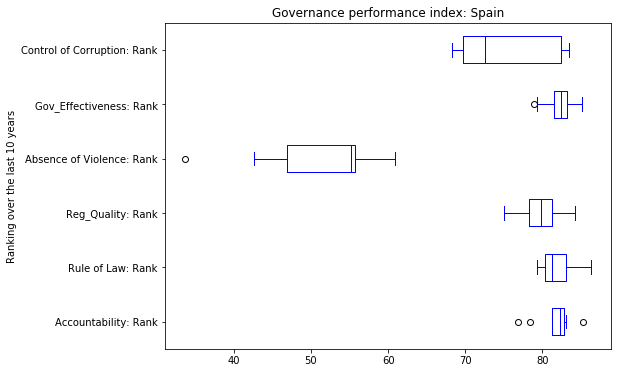

In [29]:
# Overview with Spain as an example
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

spa_rk.plot(kind='box', figsize=(8, 6), color='blue' , vert=False)

plt.title('Governance performance index: Spain')
plt.ylabel('Ranking over the last 10 years')

plt.show()

In [30]:
# Overview per category
acc = pd.concat([spa_rk['Accountability: Rank'], che_rk['Accountability: Rank'], gbr_rk['Accountability: Rank']], axis=1, keys=['Spain', 'Switzerland', 'United Kingdom'])
vio = pd.concat([spa_rk['Absence of Violence: Rank'], che_rk['Absence of Violence: Rank'], gbr_rk['Absence of Violence: Rank']], axis=1, keys=['Spain', 'Switzerland', 'United Kingdom'])
gov = pd.concat([spa_rk['Gov_Effectiveness: Rank'], che_rk['Gov_Effectiveness: Rank'], gbr_rk['Gov_Effectiveness: Rank']], axis=1, keys=['Spain', 'Switzerland', 'United Kingdom'])
cor = pd.concat([spa_rk['Control of Corruption: Rank'], che_rk['Control of Corruption: Rank'], gbr_rk['Control of Corruption: Rank']], axis=1, keys=['Spain', 'Switzerland', 'United Kingdom'])
gov.head()

,Spain,Switzerland,United Kingdom
Years,,,
2010,78.9474,97.6077,91.866
2011,81.5166,97.6303,91.9431
2012,82.4644,97.6303,92.4171
2013,82.9384,97.6303,90.5213
2014,84.1346,99.5192,92.7885


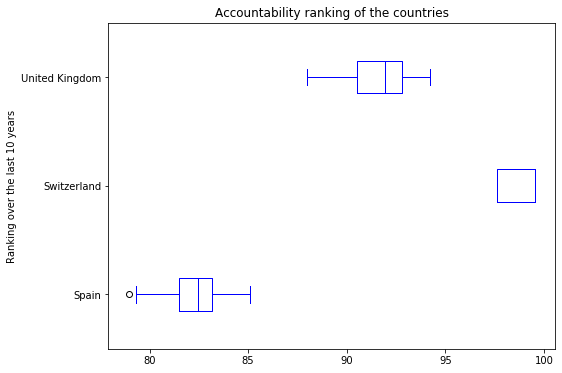

In [31]:
gov.plot(kind='box', figsize=(8, 6), color='blue' , vert=False)

plt.title('Accountability ranking of the countries')
plt.ylabel('Ranking over the last 10 years')

plt.show()

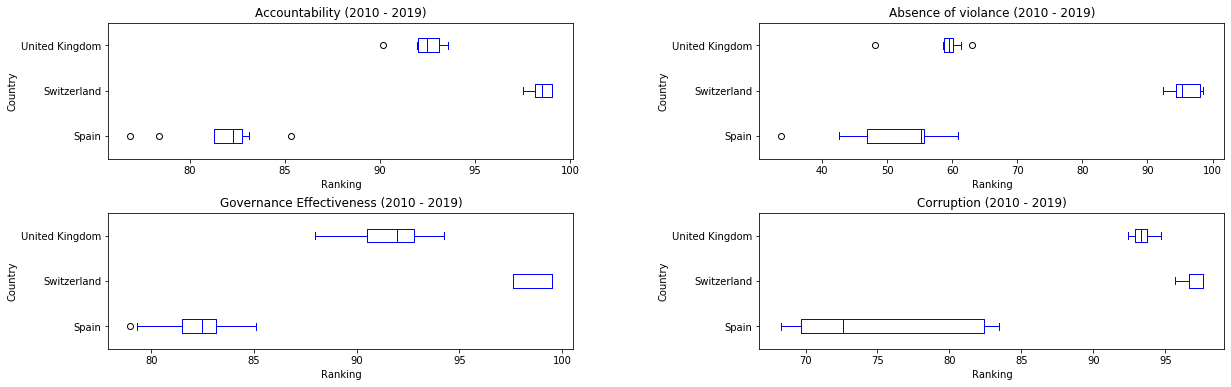

In [32]:
# Overview all three countries and categories
fig = plt.figure() # create figure
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (1 row, 2 columns, first plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Box plot, Accountability
acc.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Accountability (2010 - 2019)')
ax0.set_xlabel('Ranking')
ax0.set_ylabel('Country')

# Subplot 2: Box plot, Violence
vio.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax1) # add to subplot 1
ax1.set_title('Absence of violance (2010 - 2019)')
ax1.set_xlabel('Ranking')
ax1.set_ylabel('Country')

# Subplot 3: Box plot, Governance Effectiveness
gov.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax2) # add to subplot 1
ax2.set_title('Governance Effectiveness (2010 - 2019)')
ax2.set_xlabel('Ranking')
ax2.set_ylabel('Country')

# Subplot 4: Box plot, Violence
cor.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax3) # add to subplot 1
ax3.set_title('Corruption (2010 - 2019)')
ax3.set_xlabel('Ranking')
ax3.set_ylabel('Country')

plt.show()

## Property prices in Europe's main capitals

In [34]:
prop = pd.read_csv('Data/PropPriceEUR_light.csv', skiprows=0)
prop = prop.dropna()
prop.head()

,Location,City,Country,Cost
0,"Tirana, Albania",Tirana,Albania,1663.71
1,"Vienna, Austria",Vienna,Austria,7138.82
2,"Minsk, Belarus",Minsk,Belarus,1477.79
3,"Brussels, Belgium",Brussels,Belgium,3353.41
4,"Sarajevo, Bosnia And Herzegovina",Sarajevo,Bosnia And Herzegovina,1747.52


In [35]:
# Installing the libariers for visualisation
# importing libraries and files
# !conda install -c conda-forge folium=0.5.0 --yes #if necessary

import pandas as pd 
from pandas import DataFrame, read_csv
import folium

In [36]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [37]:
# Creating the EUR map with the three cities imposed
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[51.4934, 0], zoom_start=3, tiles="Mapbox Bright")

# generate choropleth map using the average property cost of each of the three countries
world_map.choropleth(
    geo_data=world_geo,
    data=prop,
    columns=['Country', 'Cost'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

The above map shows that Switzerland and United Kingdom are on the more expensive site in comparison to Spain.  
Overall, are the property cost greatly  varying in Europe. Let's see in more detail below in the next section.  

**FYI:** For Switzerland, United Kingdom and Spain the actual candidate cities were selected. For all other countries the table is hold the capital city price level.

In [38]:
sel = prop[prop['City'].isin(['London','Zurich','Barcelona'])]
#sel = sel.rename({'EUR / m2':'Cost'}, axis=1).astype({'Cost': int})
sel.columns = list(map(str, sel.columns))

ctry = sel[['Country','City','Cost']]
ctry.sort_values(by=['Country'], ascending=False)
ctry.replace(' ','')
ctry.reset_index(drop=True, inplace=True) 

ctry

,Country,City,Cost
0,Spain,Barcelona,4524.33
1,Switzerland,Zurich,11728.95
2,United Kingdom,London,12412.50


## Macro Evaluation and Decision Tree

In [39]:
#Importing libariers and preparing the decision tree
import pandas as pd 
from pandas import DataFrame, read_csv
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [40]:
my_data = pd.read_csv('Data/DecisionMatrix.csv', skiprows=0, delimiter=",")
my_data = my_data.dropna()
my_data = my_data.drop(['Nb','Year'], axis=1)
my_data = my_data[['U_Emp', 'UL_Cost', 'Wage', 'Cor_Tax', 'CPI_Rank','GPI_Acc','GPI_Law','GPI_Qual','GPI_Violo','GPI_Effe','GPI_Corr','Prop_Cost','Country']]
my_data[0:5]

,U_Emp,UL_Cost,Wage,Cor_Tax,CPI_Rank,GPI_Acc,GPI_Law,GPI_Qual,GPI_Violo,GPI_Effe,GPI_Corr,Prop_Cost,Country
0,19.875,105.6,41034,30.0,60,85.30806,86.25592,84.21053,33.64929,78.94736,82.38095,5921.47,Spain
1,21.408,103.8,40453,30.0,62,83.09859,85.91549,81.51659,48.34123,81.51659,82.46445,5746.78,Spain
2,24.792,101.2,39302,30.0,65,82.15962,83.09859,78.19905,42.65403,82.46445,83.41232,5577.25,Spain
3,26.117,100.3,39391,30.0,59,78.40376,81.69014,79.14692,46.91943,82.93839,78.19905,5412.72,Spain
4,24.450,100.0,39398,30.0,60,76.84729,80.28846,75.00000,55.23809,84.13461,72.11539,5253.05,Spain


In [52]:
my_data.describe()

,U_Emp,UL_Cost,Wage,Cor_Tax,CPI_Rank,GPI_Acc,GPI_Law,GPI_Qual,GPI_Violo,GPI_Effe,GPI_Corr,Prop_Cost
count,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,159.705167,100.703333,49230.566667,23.806667,74.70000,90.810827,90.792382,90.454791,68.360336,90.827791,88.499985,8882.651000
std,816.764407,3.398629,10514.242901,3.773129,11.18851,7.209178,6.653487,8.136289,20.684020,7.056335,10.205483,2757.998435
min,3.767000,95.300000,38761.000000,19.000000,57.00000,76.847290,79.326920,75.000000,33.649290,78.947360,68.269230,4522.610000
25%,4.797750,99.025000,40179.250000,21.100000,62.00000,82.843612,83.802815,81.316648,55.357140,83.413462,82.401825,5619.632500
50%,6.846000,100.000000,44398.500000,21.600000,79.00000,92.409135,93.143875,94.989520,59.619725,91.904580,93.314615,10067.775000
75%,19.045750,101.200000,62932.250000,27.500000,85.00000,98.098935,95.879780,96.153850,94.306027,97.630330,96.409607,10996.052500
max,4484.000000,111.600000,64285.000000,30.000000,86.00000,99.052130,99.038460,98.557690,98.578200,99.519230,97.630330,12412.000000


In [41]:
# Preprocessing / defining features
X = my_data[['U_Emp', 'UL_Cost', 'Wage', 'Cor_Tax', 'CPI_Rank','GPI_Acc','GPI_Law','GPI_Qual','GPI_Violo','GPI_Effe','GPI_Corr','Prop_Cost']].values
X[0:5]

array([[1.987500e+01, 1.056000e+02, 4.103400e+04, 3.000000e+01,
        6.000000e+01, 8.530806e+01, 8.625592e+01, 8.421053e+01,
        3.364929e+01, 7.894736e+01, 8.238095e+01, 5.921470e+03],
       [2.140800e+01, 1.038000e+02, 4.045300e+04, 3.000000e+01,
        6.200000e+01, 8.309859e+01, 8.591549e+01, 8.151659e+01,
        4.834123e+01, 8.151659e+01, 8.246445e+01, 5.746780e+03],
       [2.479200e+01, 1.012000e+02, 3.930200e+04, 3.000000e+01,
        6.500000e+01, 8.215962e+01, 8.309859e+01, 7.819905e+01,
        4.265403e+01, 8.246445e+01, 8.341232e+01, 5.577250e+03],
       [2.611700e+01, 1.003000e+02, 3.939100e+04, 3.000000e+01,
        5.900000e+01, 7.840376e+01, 8.169014e+01, 7.914692e+01,
        4.691943e+01, 8.293839e+01, 7.819905e+01, 5.412720e+03],
       [2.445000e+01, 1.000000e+02, 3.939800e+04, 3.000000e+01,
        6.000000e+01, 7.684729e+01, 8.028846e+01, 7.500000e+01,
        5.523809e+01, 8.413461e+01, 7.211539e+01, 5.253050e+03]])

In [42]:
y = my_data["Country"]
y[0:5]

0    Spain
1    Spain
2    Spain
3    Spain
4    Spain
Name: Country, dtype: object

In [43]:
# Setting up the Decision Tree
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [44]:
# Modelling
ctryTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
ctryTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
ctryTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
# Prediction
predTree = ctryTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['Switzerland' 'Spain' 'United Kingdom' 'United Kingdom' 'Switzerland']
15       Switzerland
5              Spain
22    United Kingdom
26    United Kingdom
18       Switzerland
Name: Country, dtype: object


In [47]:
# Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


In [49]:
# Visulaisation (install libraries if needed)
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

#  conda update -n base -c defaults conda    in case an update is necessary

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [50]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

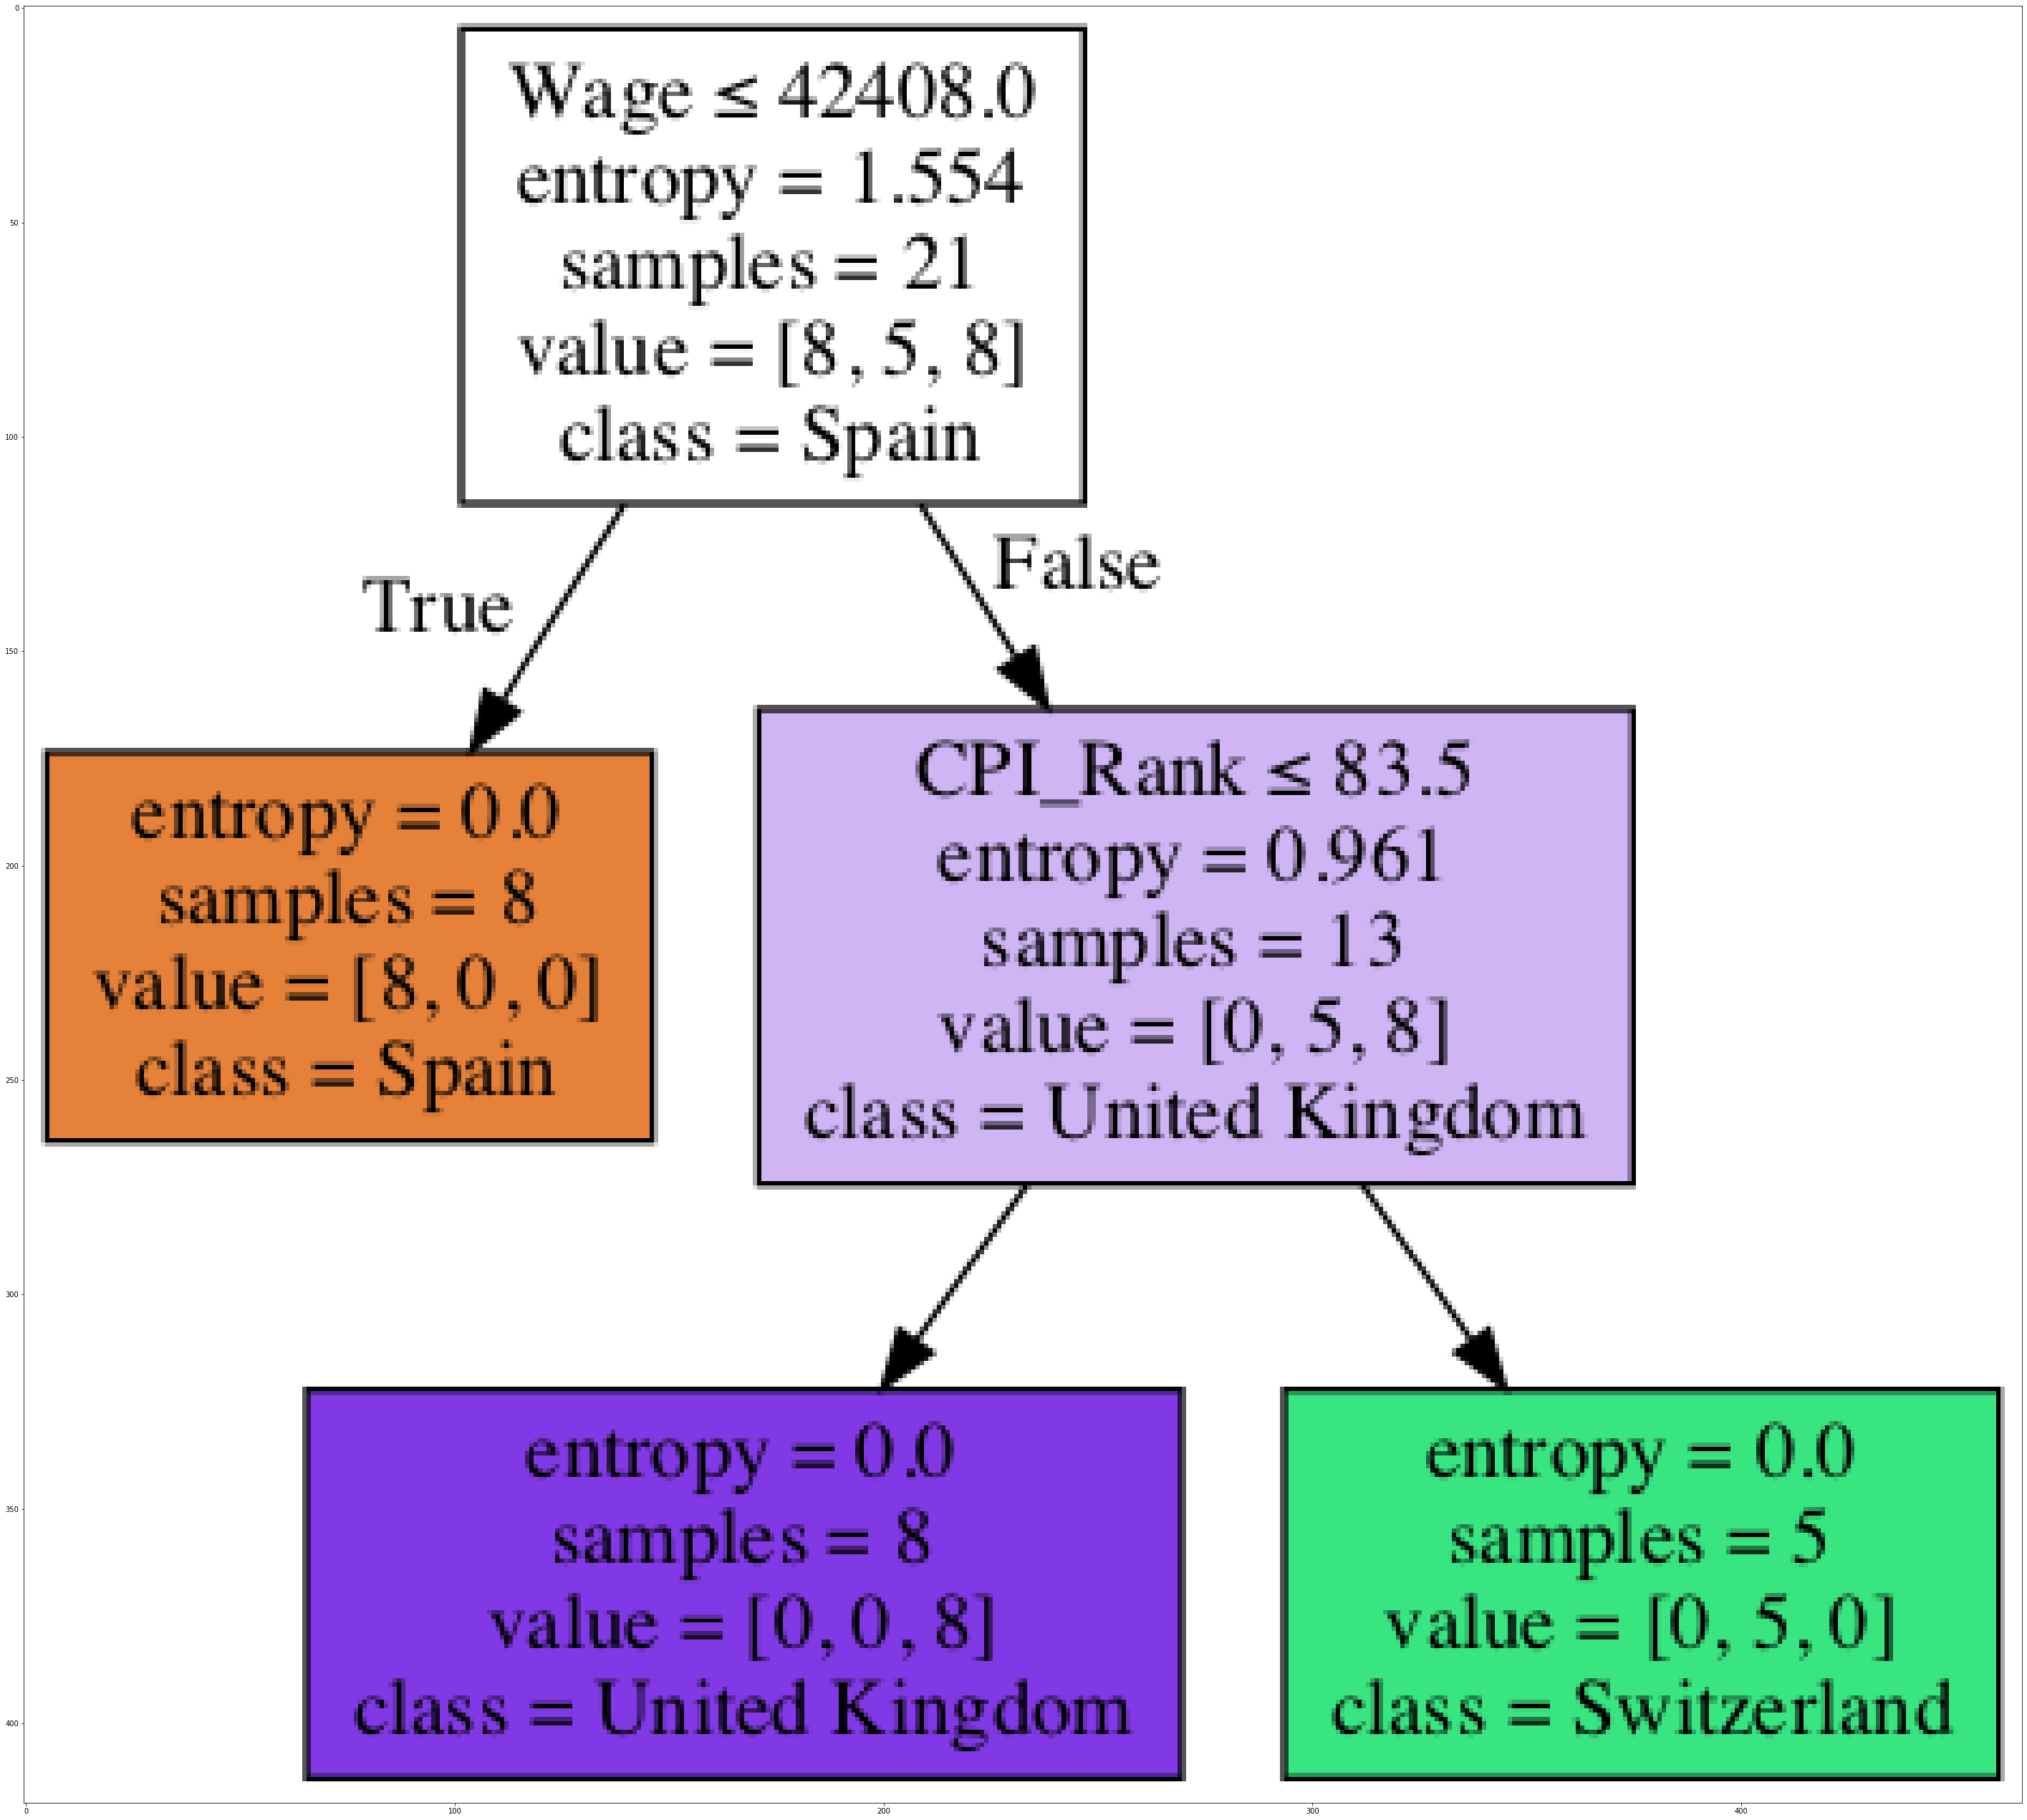

In [51]:
dot_data = StringIO()
filename = "ctytree.png"
featureNames = my_data.columns[0:12]
targetNames = my_data["Country"].unique().tolist()
out=tree.export_graphviz(ctryTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 100))
plt.imshow(img,interpolation='nearest')

## Analysis of Zurich and Clustering for prefered borough

In [53]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [54]:
with open('Data/stzh.adm_stadtkreise_a.json') as json_data:
    zrh_data = json.load(json_data)

In [55]:
neighborhoods_data = zrh_data['features']

In [56]:
# Defining the location: Zurich
address = 'Zurich, ZH, Switzerland'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Zurich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Zurich are 47.3723941, 8.5423328.


### Which of the boroughs "Kreise" would fit best to the targeted workforce to feel home
To define the best cluster we're relying on the data from Foursquare.

In [57]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'KTIAERGR5QSKR3SEMZSPSN2XOOWQKKZVHENIGBGM2LDUVGYJ' # your Foursquare ID
CLIENT_SECRET = '4CWWT2Z1IE5UD0A0RFEP4YNOXO4TEOEOD3XIX4O1RPAGO4CZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KTIAERGR5QSKR3SEMZSPSN2XOOWQKKZVHENIGBGM2LDUVGYJ
CLIENT_SECRET:4CWWT2Z1IE5UD0A0RFEP4YNOXO4TEOEOD3XIX4O1RPAGO4CZ


In [58]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

In [59]:
results = requests.get(url).json()
with open('zrh_venues.json', 'w') as json_file:
    json.dump(results, json_file)

In [60]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [61]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Old Crow,Cocktail Bar,47.372092,8.541024
1,Lindenhof,Pedestrian Plaza,47.373005,8.540883
2,Widder Bar,Hotel Bar,47.372415,8.539863
3,Widder Hotel,Hotel,47.372449,8.539973
4,Café Schober,Café,47.371400,8.544149


In [62]:
# Defining a function to extract all venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [64]:
# Provide the city borough information
neighborhoods_data = pd.read_csv('Data/zrh_borough.csv', skiprows=0)
neighborhoods_data.head()

,DistrictNb,DistrictName,Neighborhood,postalcode,Area,Population,Non-Swiss Citizens,latitude,longitude
0,Kreis 1,Altstadt,Rathaus,8001,0.38,"3,081",23.90%,47.3720,8.5413
1,Kreis 1,Altstadt,Hochschulen,8001,0.56,695,27.50%,47.3720,8.5413
2,Kreis 1,Altstadt,Lindenhof,8001,0.23,950,20.30%,47.3720,8.5413
3,Kreis 1,Altstadt,City,8001,0.64,846,28.30%,47.3720,8.5413
4,Kreis 2,na,Wollishofen,8038,5.75,"15,592",22.90%,47.3416,8.5369


In [66]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

neighborhoods['Borough'] = neighborhoods_data['DistrictNb']
neighborhoods['Neighborhood'] = neighborhoods_data['Neighborhood']
neighborhoods['Latitude'] = neighborhoods_data['latitude']
neighborhoods['Longitude'] = neighborhoods_data['longitude']
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Kreis 1,Rathaus,47.3720,8.5413
1,Kreis 1,Hochschulen,47.3720,8.5413
2,Kreis 1,Lindenhof,47.3720,8.5413
3,Kreis 1,City,47.3720,8.5413
4,Kreis 2,Wollishofen,47.3416,8.5369


In [68]:
# create map of Zurich using latitude and longitude values and show the boroughs
map_zrh = folium.Map(location=[latitude, longitude], zoom_start=10)

map_zrh = folium.Map(location=[latitude, longitude], zoom_start=12)
map_zrh.choropleth('Data/stzh.adm_stadtkreise_a.json', 
                    key_on='feature.properties.bezeichnung.name',
                    fill_color='Orange', 
                    fill_opacity=0.4, 
                    line_opacity=0.9,)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_zrh)  
    
map_zrh

In [69]:
# Explore Neighborhoods in Zurich
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [70]:
zrh_venues = getNearbyVenues(names = neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )
zrh_venues.head()

Rathaus
Hochschulen
Lindenhof
City
Wollishofen
Leimbach
Enge
Alt-Wiedikon
Friesenberg
Sihlfeld
Werd
Langstrasse
Hard
Gewerbeschule
Escher Wyss
Unterstrass
Oberstrass
Fluntern
Hottingen
Hirslanden
Witikon
Seefeld
Mühlebach
Weinegg
Albisrieden
Altstetten
Höngg
Wipkingen
Affoltern
Oerlikon
Seebach
Saatlen
Schwamendingen Mitte
Hirzenbach


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rathaus,47.372,8.5413,Old Crow,47.372092,8.541024,Cocktail Bar
1,Rathaus,47.372,8.5413,Lindenhof,47.373005,8.540883,Pedestrian Plaza
2,Rathaus,47.372,8.5413,Widder Bar,47.372415,8.539863,Hotel Bar
3,Rathaus,47.372,8.5413,Widder Hotel,47.372449,8.539973,Hotel
4,Rathaus,47.372,8.5413,Café Schober,47.371400,8.544149,Café


### Analye each neighborhood

In [71]:
# one hot encoding
zrh_onehot = pd.get_dummies(zrh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
zrh_onehot['Neighborhood'] = zrh_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [zrh_onehot.columns[-1]] + list(zrh_onehot.columns[:-1])
zrh_onehot = zrh_onehot[fixed_columns]

zrh_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bar,Beer Garden,Bistro,Bookstore,Boutique,Bratwurst Joint,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cambodian Restaurant,Candy Store,Cheese Shop,Chinese Restaurant,Christmas Market,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Doner Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Fondue Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Kids Store,Korean Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Music Store,Music Venue,Nightclub,Noodle House,Opera House,Optical Shop,Other Great Outdoors,Outdoors & Recreation,Paella Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pier,Pizza Place,Plaza,Pool,Pool Hall,Pop-Up Shop,Pub,Restaurant,River,Rock Club,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spanish Restaurant,Sports Bar,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Taco Place,Thai Restaurant,Theater,Trail,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Yoga Studio
0,Rathaus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Rathaus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Rathaus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Rathaus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Rathaus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
zrh_grouped = zrh_onehot.groupby('Neighborhood').mean().reset_index()
zrh_grouped.head()

,Neighborhood,Accessories Store,American Restaurant,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bar,Beer Garden,Bistro,Bookstore,Boutique,Bratwurst Joint,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cambodian Restaurant,Candy Store,Cheese Shop,Chinese Restaurant,Christmas Market,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Doner Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Fondue Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Kids Store,Korean Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Music Store,Music Venue,Nightclub,Noodle House,Opera House,Optical Shop,Other Great Outdoors,Outdoors & Recreation,Paella Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pier,Pizza Place,Plaza,Pool,Pool Hall,Pop-Up Shop,Pub,Restaurant,River,Rock Club,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spanish Restaurant,Sports Bar,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Taco Place,Thai Restaurant,Theater,Trail,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Yoga Studio
0,Affoltern,0.0,0.0,0.00,0.0,0.00,0.000000,0.090909,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.181818,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.090909,0.0,0.00,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.090909,0.00,0.0,0.0,0.0,0.0,0.090909,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.181818,0.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.090909,0.000000,0.0,0.00,0.0,0.0,0.00,0.0
1,Albisrieden,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.20,0.0,0.00,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.200000,0.0,0.00,0.200000,0.0,0.00,0.0,0.0,0.000000,0.200000,0.2,0.00,0.0,0.0,0.00,0.0
2,Alt-Wiedikon,0.0,0.0,0.00,0.0,0.00,0.090909,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.272727,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.090909,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.090909,0.0,0.00,0.0,0.000000,0.

In [83]:
# select the top 10 venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [84]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = zrh_grouped['Neighborhood']

for ind in np.arange(zrh_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(zrh_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Affoltern,Bus Station,Supermarket,Hotel,Miscellaneous Shop,Department Store,Italian Restaurant,Train Station,Athletics & Sports,Diner,Falafel Restaurant
1,Albisrieden,Trattoria/Osteria,Tram Station,Grocery Store,Supermarket,Swiss Restaurant,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,Alt-Wiedikon,Bus Station,Skating Rink,Motorcycle Shop,Hotel,Pool,Tram Station,Asian Restaurant,Supermarket,Light Rail Station,Eastern European Restaurant
3,Altstetten,Supermarket,Swiss Restaurant,Bakery,Plaza,Mediterranean Restaurant,Fast Food Restaurant,Japanese Restaurant,Italian Restaurant,Pool,Asian Restaurant
4,City,Swiss Restaurant,Café,Bar,French Restaurant,Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Department Store,Pedestrian Plaza


### Clustering the neighborhoods

In [85]:
# set number of clusters
kclusters = 5

zrh_grouped_clustering = zrh_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(zrh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 4, 1, 0, 0, 3, 0, 2, 1, 0], dtype=int32)

In [86]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

zrh_merged = neighborhoods

# merge zrh_grouped with zrh_data to add latitude/longitude for each neighborhood
zrh_merged = zrh_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

zrh_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kreis 1,Rathaus,47.3720,8.5413,0,Swiss Restaurant,Café,Bar,French Restaurant,Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Department Store,Pedestrian Plaza
1,Kreis 1,Hochschulen,47.3720,8.5413,0,Swiss Restaurant,Café,Bar,French Restaurant,Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Department Store,Pedestrian Plaza
2,Kreis 1,Lindenhof,47.3720,8.5413,0,Swiss Restaurant,Café,Bar,French Restaurant,Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Department Store,Pedestrian Plaza
3,Kreis 1,City,47.3720,8.5413,0,Swiss Restaurant,Café,Bar,French Restaurant,Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Department Store,Pedestrian Plaza
4,Kreis 2,Wollishofen,47.3416,8.5369,3,Restaurant,Harbor / Marina,Swiss Restaurant,Fast Food Restaurant,Community Center,Tram Station,Pool,Thai Restaurant,Bus Station,Music Venue


In [77]:
# create map, no value add -> skip
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(zrh_merged['Latitude'], zrh_merged['Longitude'], zrh_merged['Neighborhood'], zrh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine each cluster

In [87]:
# Cluster 1: 
zrh_merged.loc[zrh_merged['Cluster Labels'] == 0, zrh_merged.columns[[1] + list(range(5, zrh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rathaus,Swiss Restaurant,Café,Bar,French Restaurant,Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Department Store,Pedestrian Plaza
1,Hochschulen,Swiss Restaurant,Café,Bar,French Restaurant,Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Department Store,Pedestrian Plaza
2,Lindenhof,Swiss Restaurant,Café,Bar,French Restaurant,Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Department Store,Pedestrian Plaza
3,City,Swiss Restaurant,Café,Bar,French Restaurant,Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Department Store,Pedestrian Plaza
10,Werd,Bar,Restaurant,Swiss Restaurant,Italian Restaurant,Park,Gym / Fitness Center,Café,Hotel,Peruvian Restaurant,Outdoors & Recreation
11,Langstrasse,Bar,Restaurant,Swiss Restaurant,Italian Restaurant,Park,Gym / Fitness Center,Café,Hotel,Peruvian Restaurant,Outdoors & Recreation
12,Hard,Bar,Restaurant,Swiss Restaurant,Italian Restaurant,Park,Gym / Fitness Center,Café,Hotel,Peruvian Restaurant,Outdoors & Recreation
13,Gewerbeschule,Nightclub,Bar,Restaurant,Café,Pizza Place,Gym / Fitness Center,Hotel,Art Museum,Italian Restaurant,Mexican Restaurant
14,Escher Wyss,Nightclub,Bar,Restaurant,Café,Pizza Place,Gym / Fitness Center,Hotel,Art Museum,Italian Restaurant,Mexican Restaurant
15,Unterstrass,Tram Station,Bakery,Pizza Place,Italian Restaurant,Café,Supermarket,Grocery Store,Gourmet Shop,Kids Store,Food & Drink Shop


In [88]:
# Cluster 2: 
zrh_merged.loc[zrh_merged['Cluster Labels'] == 2, zrh_merged.columns[[1] + list(range(5, zrh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Fluntern,Tram Station,Hotel Bar,Fondue Restaurant,Hotel,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Food & Drink Shop
31,Saatlen,Tram Station,Swiss Restaurant,Pizza Place,Athletics & Sports,Yoga Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Eastern European Restaurant
32,Schwamendingen Mitte,Tram Station,Swiss Restaurant,Pizza Place,Athletics & Sports,Yoga Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Eastern European Restaurant
33,Hirzenbach,Tram Station,Swiss Restaurant,Pizza Place,Athletics & Sports,Yoga Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Eastern European Restaurant


In [89]:
# Cluster 3: 
zrh_merged.loc[zrh_merged['Cluster Labels'] == 3, zrh_merged.columns[[1] + list(range(5, zrh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Wollishofen,Restaurant,Harbor / Marina,Swiss Restaurant,Fast Food Restaurant,Community Center,Tram Station,Pool,Thai Restaurant,Bus Station,Music Venue
5,Leimbach,Restaurant,Harbor / Marina,Swiss Restaurant,Fast Food Restaurant,Community Center,Tram Station,Pool,Thai Restaurant,Bus Station,Music Venue
6,Enge,Restaurant,Harbor / Marina,Swiss Restaurant,Fast Food Restaurant,Community Center,Tram Station,Pool,Thai Restaurant,Bus Station,Music Venue


In [90]:
# Cluster 4: 
zrh_merged.loc[zrh_merged['Cluster Labels'] == 4, zrh_merged.columns[[1] + list(range(5, zrh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Albisrieden,Trattoria/Osteria,Tram Station,Grocery Store,Supermarket,Swiss Restaurant,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [91]:
# Cluster 5: no more values !
zrh_merged.loc[zrh_merged['Cluster Labels'] == 5, zrh_merged.columns[[1] + list(range(5, zrh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
